In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/project2_data')

Mounted at /content/drive


In [ ]:
import pandas as pd
clear = pd.read_csv('application_train_merge_clear_nomissing.csv',index_col=0 )
clear

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,...,bureau_AMT_CREDIT_SUM_OVERDUE,bureau_CREDIT_TYPE_Car loan,bureau_CREDIT_TYPE_Consumer credit,bureau_CREDIT_TYPE_Credit card,bureau_CREDIT_TYPE_Microloan,bureau_CREDIT_TYPE_Mortgage,bureau_DAYS_CREDIT_UPDATE,bureau_CLOSE,bureau_SK_ID_BUREAU_counts,FLAG_DOCUMENT_RATIO
0,100002,1.0,0,202500.0,1,-9461,-637,-3648.0,-2120,1,...,0.0,0.0,4.0,4.0,0.0,0.0,-499.875000,6.0,8.0,0.05
1,100003,0.0,0,270000.0,3,-16765,-1188,-1186.0,-291,1,...,0.0,0.0,2.0,2.0,0.0,0.0,-816.000000,0.0,4.0,0.05
2,100004,0.0,0,67500.0,1,-19046,-225,-4260.0,-2531,1,...,0.0,0.0,2.0,0.0,0.0,0.0,-532.000000,0.0,2.0,0.00
3,100006,0.0,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,...,0.0,0.0,3.0,1.0,0.0,0.0,-481.714286,0.0,4.0,0.05
4,100007,0.0,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,...,0.0,0.0,1.0,0.0,0.0,0.0,-783.000000,0.0,1.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0,157500.0,1,-9327,-236,-8456.0,-1982,1,...,0.0,0.0,3.0,1.0,0.0,0.0,-481.714286,0.0,4.0,0.05
307507,456252,0.0,0,72000.0,1,-20775,-1224,-4388.0,-4090,0,...,0.0,0.0,3.0,1.0,0.0,0.0,-481.714286,0.0,4.0,0.05
307508,456253,0.0,0,153000.0,3,-14966,-7921,-6737.0,-5150,1,...,0.0,0.0,3.0,1.0,0.0,0.0,-253.250000,3.0,4.0,0.05
307509,456254,1.0,0,171000.0,1,-11961,-4786,-2562.0,-931,1,...,0.0,0.0,1.0,0.0,0.0,0.0,-401.000000,1.0,1.0,0.05


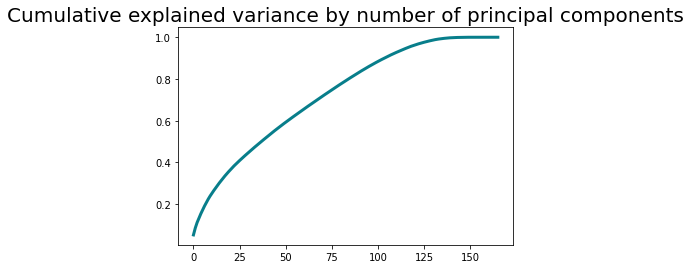

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = clear.iloc[:, 2:]
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)
pca = PCA().fit(Z_sk)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


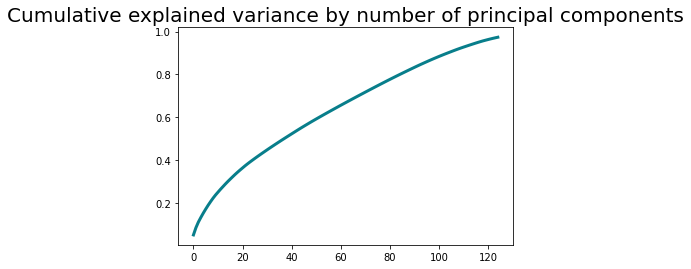

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = clear.iloc[:, 2:]
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)
pca = PCA(n_components=125).fit(Z_sk)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    # columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    # columns=[f'PC{i}' for i in range(1, 3)],
    columns=[f'PC{i}' for i in range(1, 126)],
    index=X.columns
)
loadings.sort_values(by=['PC1'], ascending=False).head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
PREV_CREDIT_max,0.800540,0.265017,-0.045696,0.121008,0.134961,0.006497,-0.032031,-0.031139,0.082732,0.085843,...,-0.009924,-0.000875,-0.000391,0.035176,-0.108181,0.013849,0.007136,0.003156,0.005664,0.009415
PORTFOLIO_Cash,0.794644,0.050399,-0.215525,0.004915,0.011719,-0.020001,-0.001847,-0.145828,0.059647,-0.021371,...,-0.043728,0.005021,-0.038676,-0.006783,-0.029432,0.004622,0.008836,0.002332,0.000267,0.016384
CONTRACT_Cash_loans,0.794432,0.050811,-0.215817,0.004693,0.011129,-0.020522,-0.001251,-0.145621,0.058997,-0.021413,...,-0.044343,0.004917,-0.038802,-0.007833,-0.029789,0.004439,0.009016,0.002308,0.000378,0.016470
PREV_GOODS_PRICE_max,0.786411,0.264967,-0.037423,0.128480,0.138488,0.018344,-0.032671,-0.028445,0.084433,0.096751,...,-0.001496,0.000300,0.000848,0.034409,-0.098303,0.012632,0.006260,0.003089,0.006442,0.005275
PREV_APPLICATION_max,0.782787,0.255680,-0.039301,0.139731,0.164271,0.003336,-0.031121,-0.040197,0.094810,0.092508,...,-0.009719,-0.000763,-0.002149,0.037054,-0.112039,0.013846,0.007315,0.003254,0.006221,0.000616
PREV_CREDIT_sum,0.740598,0.222987,-0.019116,0.078363,0.101637,-0.034457,-0.008641,-0.056434,0.047710,-0.030696,...,-0.032651,0.001432,0.003433,-0.034424,0.012710,-0.006623,0.014217,0.001579,0.008836,0.167211
PC_CNT_INSTALMENT_max,0.700409,0.065679,-0.105684,-0.020527,0.109675,-0.137587,-0.087237,0.004240,0.052334,-0.071081,...,-0.090511,0.016797,-0.029309,0.079866,0.064304,0.001247,-0.004785,-0.003891,-0.039124,-0.178415
PC_CNT_INSTALMENT_mean,0.585978,0.037078,-0.211591,0.062978,0.088032,-0.128712,-0.022104,0.019077,0.060171,0.137467,...,-0.030765,0.007406,-0.000943,0.027381,0.079293,-0.002446,-0.006203,-0.007369,-0.013159,-0.108837
SK_NUM_PREV,0.537194,0.083942,0.144123,-0.194072,0.022451,-0.057701,-0.174314,-0.033462,-0.036443,-0.514107,...,-0.047150,0.023557,-0.052214,0.025377,0.128441,-0.013532,0.014505,0.001399,-0.015940,0.043976
AMT_REQ_CREDIT_BUREAU_YEAR,0.533318,0.111580,-0.131058,-0.078334,-0.080360,-0.036204,-0.031983,0.015819,-0.097250,-0.199491,...,0.263687,-0.046206,0.180564,-0.224935,-0.211386,0.012933,-0.087071,-0.007952,0.010067,-0.114632


In [ ]:
result = pd.DataFrame(loadings.sum(axis=1),columns=['scores'])
# result
result.sort_values(by=['scores'], ascending=False).head(20)

,scores
AMT_INCOME_TOTAL,4.113230
bureau_AMT_CREDIT_SUM_LIMIT,3.271696
PREV_GOODS_PRICE_max,2.561619
PREV_APPLICATION_max,2.472838
PREV_CREDIT_max,2.423023
bureau_AMT_CREDIT_SUM_OVERDUE,2.348156
AMT_REQ_CREDIT_BUREAU_QRT,2.328310
PREV_DOWN_PAYMENT_median,2.184385
PREV_CREDIT_sum,2.182605
PREV_ANNUITY_median,2.145436


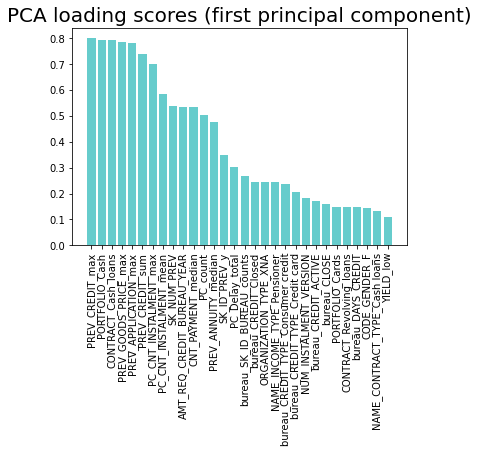

In [ ]:
#
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings
pc1_loadings = pc1_loadings.iloc[:30,:].reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#66CCCC')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# 卡方檢定
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
X_train = clear.iloc[:, 2:]
y = clear.iloc[:,1]    #target variable i.e price range

# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
X = minmax_scale.fit_transform(X_train)

#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=20)
fit = BestFeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']  
f_Scores.sort_values(by='Score', ascending=False).head(20)

,Specs,Score
17,REG_CITY_NOT_WORK_CITY,615.377434
30,CODE_GENDER_M,606.035521
16,REG_CITY_NOT_LIVE_CITY,558.708941
40,NAME_INCOME_TYPE_Pensioner,538.416471
90,ORGANIZATION_TYPE_XNA,533.222197
42,NAME_INCOME_TYPE_Working,491.439930
59,OCCUPATION_TYPE_Laborers,466.960337
29,CODE_GENDER_F,314.404540
18,LIVE_CITY_NOT_WORK_CITY,266.788515
28,NAME_CONTRACT_TYPE_Revolving loans,265.588342


In [ ]:
# 卡方檢定
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
num_feats = 20
X_train = clear.iloc[:, 2:]
y = clear.iloc[:,1]
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [ ]:
chi_feature

['DAYS_BIRTH',
 'FLAG_WORK_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'NAME_HOUSING_TYPE_With parents',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_XNA',
 'HOUSETYPE_MODE_block of flats',
 'WALLSMATERIAL_MODE_Panel',
 'EMERGENCYSTATE_MODE_No',
 'YIELD_high']

In [ ]:
# RandomForest Feature Selector
# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

X = clear.iloc[:, 2:]
y = clear[['TARGET']]

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X, y)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
feature_scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


DAYS_BIRTH                                  0.025196
DAYS_ID_PUBLISH                             0.024130
DAYS_REGISTRATION                           0.023594
DAYS_EMPLOYED                               0.023399
bureau_DAYS_CREDIT                          0.023123
DAYS_DECISION_median                        0.022876
DAYS_LATE_PAYMENT                           0.022505
SK_ID_PREV_y                                0.022344
DAYS_LAST_PHONE_CHANGE                      0.021122
PREV_ANNUITY_median                         0.020894
PREV_CRE/APP_max                            0.020542
PREV_CREDIT_sum                             0.020143
bureau_DAYS_CREDIT_UPDATE                   0.020112
bureau_AMT_CREDIT_SUM                       0.019412
bureau_SK_ID_CURR                           0.019273
bureau_DAYS_CREDIT_ENDDATE                  0.019218
PREV_CREDIT_max                             0.018992
PREV_APPLICATION_max                        0.017909
AMT_INCOME_TOTAL                            0.

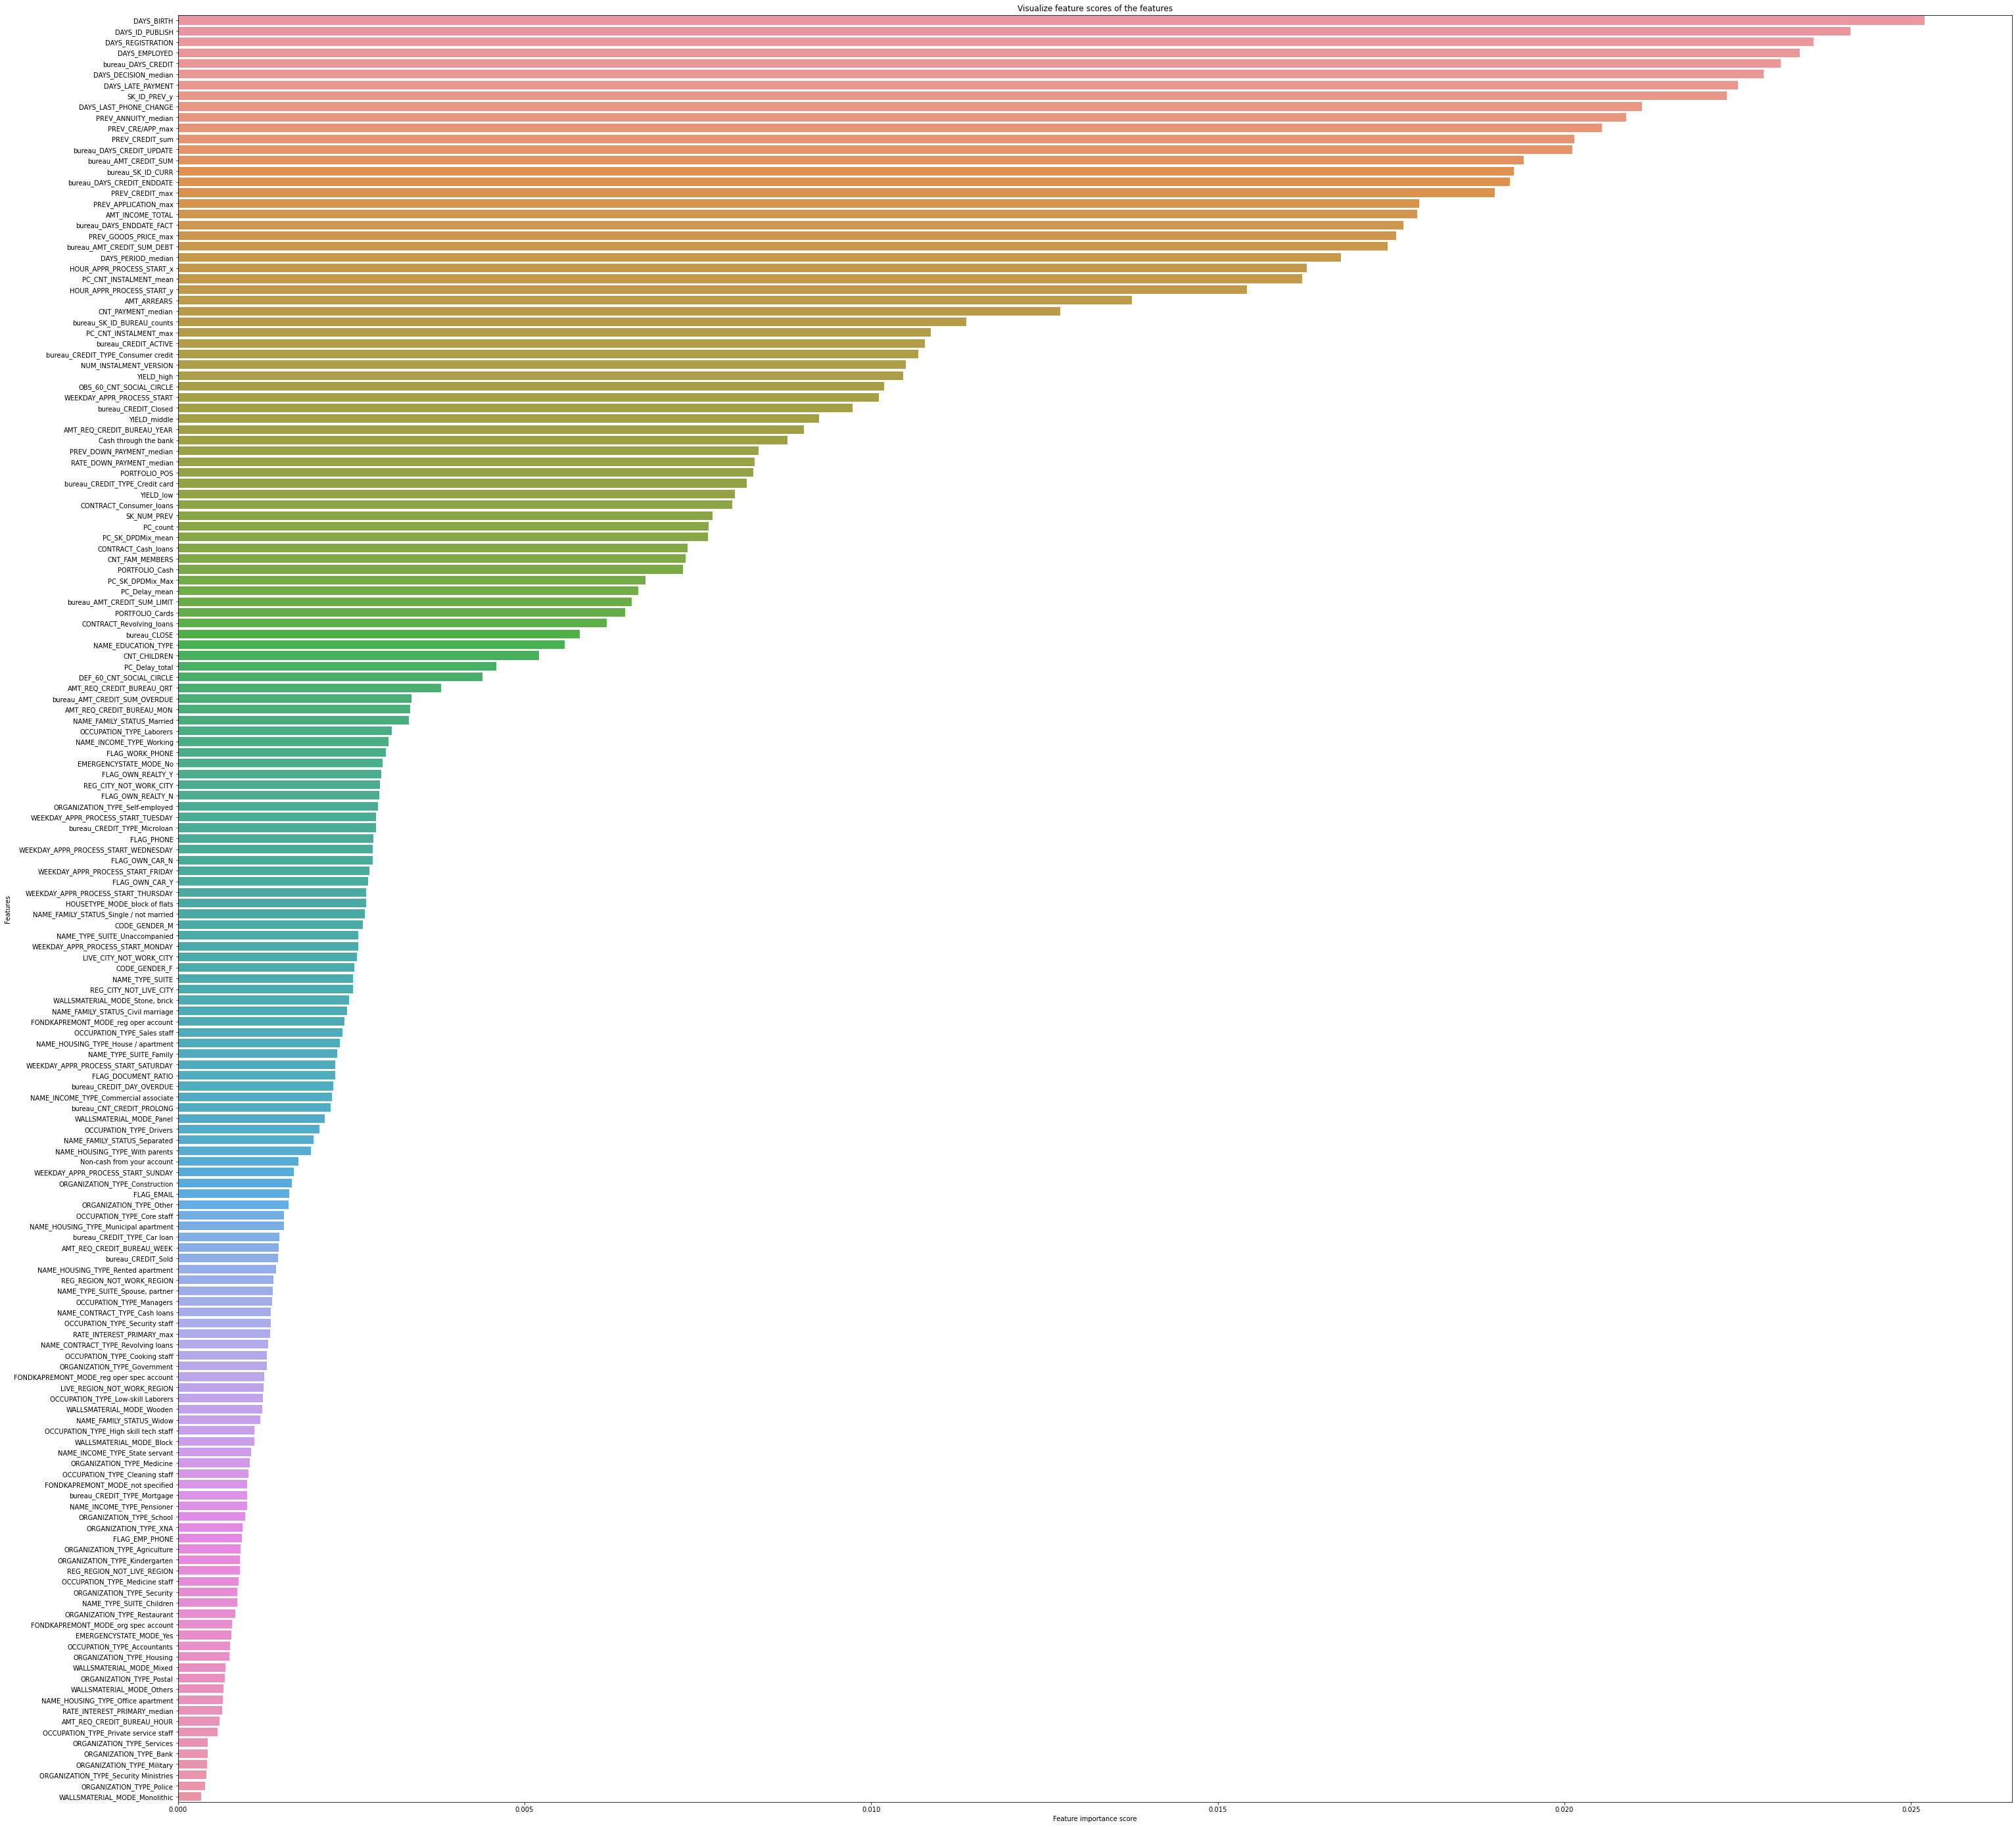

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(50, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


<Figure size 3600x3600 with 0 Axes>

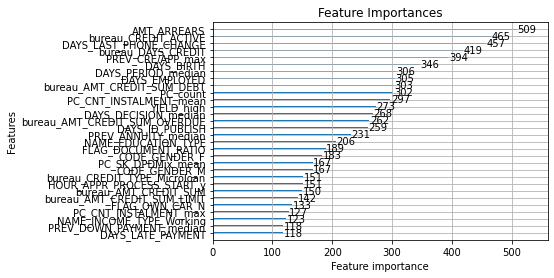

In [ ]:
import lightgbm as lgb

X = clear.iloc[:, 2:]
y = clear[['TARGET']]

lgb_params = {
    'boosting_type':'gbdt',
    'objective':'binary',
    'num_leaves':30,
    'num_round':360,
    'max_depth':8,
    'learning_rate':0.01,
    'feature_fraction':0.5,
    'bagging_fraction':0.8,
    'bagging_freq':12
}
lgb_train = lgb.Dataset(X,y)
model= lgb.train(lgb_params, lgb_train)

plt.figure(figsize=(50,50))
lgb.plot_importance(model, max_num_features=30)
plt.title("Feature Importances")
plt.show()